# Credit Card Fraud Detection
Throughout the financial sector, machine learning algorithms are being developed to detect fraudulent transactions.  In this project, that is exactly what we are going to be doing as well.  Using a dataset of of nearly 28,500 credit card transactions and multiple unsupervised anomaly detection algorithms, we are going to identify transactions with a high probability of being credit card fraud.  In this project, we will build and deploy the following two machine learning algorithms:

* Local Outlier Factor (LOF)
* Isolation Forest Algorithm

In [6]:
import sys
import numpy
import pandas
import matplotlib
import seaborn
import scipy

In [7]:
# import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 2. The Data Set


In [8]:
# Load the dataset from the csv file using pandas
data = pd.read_csv('creditcard.csv')

In [9]:
# Start exploring the dataset
print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [10]:
# Print the shape of the data
data = data.sample(frac=0.1, random_state = 1)
print(data.shape)
print(data.describe())

# V1 - V28 are the results of a PCA Dimensionality reduction to protect user identities and sensitive features

(1792, 31)
               Time           V1  ...       Amount        Class
count   1792.000000  1792.000000  ...  1792.000000  1792.000000
mean   14236.513393    -0.270126  ...    66.218996     0.003906
std     9872.002349     1.995215  ...   152.755612     0.062395
min        2.000000   -30.552380  ...     0.000000     0.000000
25%     4111.500000    -0.979354  ...     6.187500     0.000000
50%    13120.000000    -0.312150  ...    17.560000     0.000000
75%    24436.750000     1.162510  ...    62.762500     0.000000
max    29025.000000     1.597947  ...  2034.860000     1.000000

[8 rows x 31 columns]


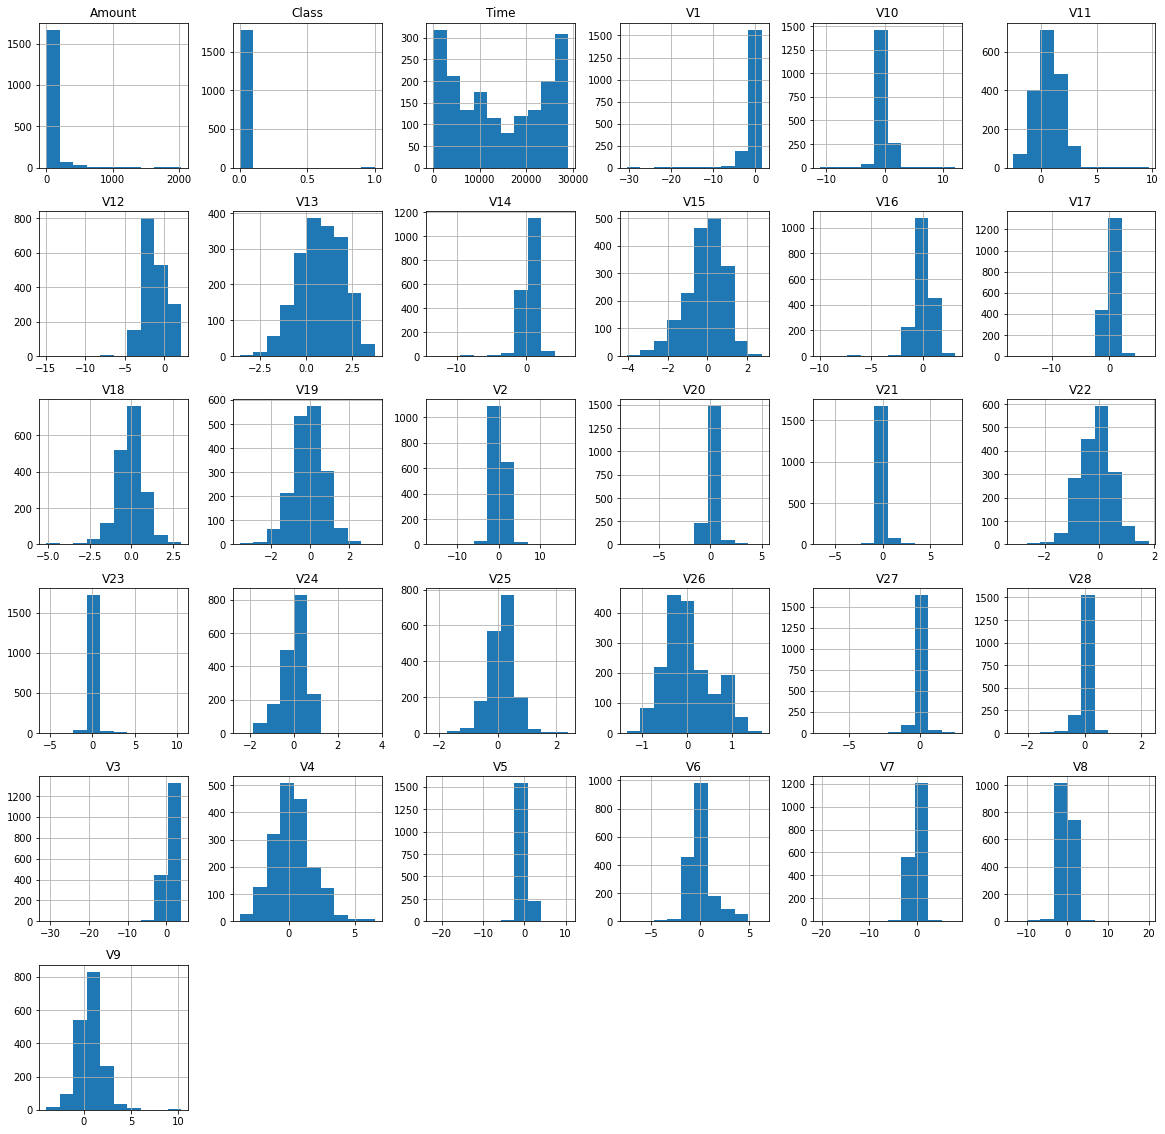

In [11]:
# Plot histograms of each parameter 
data.hist(figsize = (20, 20))
plt.show()

In [12]:
# Determine number of fraud cases in dataset

Fraud = data[data['Class'] == 1]
Valid = data[data['Class'] == 0]

outlier_fraction = len(Fraud)/float(len(Valid))
print(outlier_fraction)

print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))



0.00392156862745098
Fraud Cases: 7
Valid Transactions: 1785


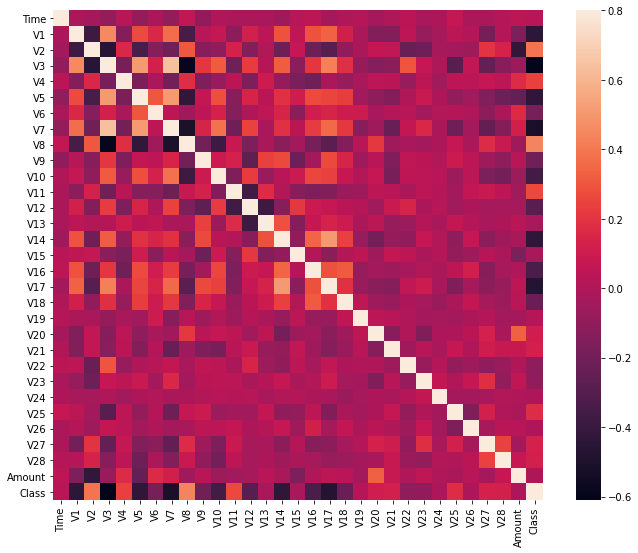

In [13]:
# Correlation matrix
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))

sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [14]:
# Get all the columns from the dataFrame
columns = data.columns.tolist()

# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Class"]]

# Store the variable we'll be predicting on
target = "Class"

X = data[columns]
Y = data[target]

# Print shapes
print(X.shape)
print(Y.shape)

(1792, 30)
(1792,)


## 3. Unsupervised Outlier Detection

Now that we have processed our data, we can begin deploying our machine learning algorithms.  We will use the following techniques: 

**Local Outlier Factor (LOF)**

The anomaly score of each sample is called Local Outlier Factor. It measures the local deviation of density of a 
given sample with respect to its neighbors. It is local in that the anomaly score depends on how isolated the 
object is with respect to the surrounding neighborhood.


**Isolation Forest Algorithm**

The IsolationForest ‘isolates’ observations by randomly selecting a feature and then randomly selecting 
a split value between the maximum and minimum values of the selected feature.

Since recursive partitioning can be represented by a tree structure, the number of splittings required to 
isolate a sample is equivalent to the path length from the root node to the terminating node.

This path length, averaged over a forest of such random trees, is a measure of normality and our decision function.

Random partitioning produces noticeably shorter paths for anomalies. Hence, when a forest of random trees 
collectively produce shorter path lengths for particular samples, they are highly likely to be anomalies.

In [15]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

# define random states
state = 1

# define outlier detection tools to be compared
classifiers = {
    "Isolation Forest": IsolationForest(max_samples=len(X),
                                        contamination=outlier_fraction,
                                        random_state=state),
    "Local Outlier Factor": LocalOutlierFactor(
        n_neighbors=20,
        contamination=outlier_fraction)}

In [16]:
# Fit the model
plt.figure(figsize=(9, 7))
n_outliers = len(Fraud)


for i, (clf_name, clf) in enumerate(classifiers.items()):
    
    # fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_pred = clf.negative_outlier_factor_
    else:
        clf.fit(X)
        scores_pred = clf.decision_function(X)
        y_pred = clf.predict(X)
    
    # Reshape the prediction values to 0 for valid, 1 for fraud. 
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    
    n_errors = (y_pred != Y).sum()
    
    # Run classification metrics
    print('{}: {}'.format(clf_name, n_errors))
    print(accuracy_score(Y, y_pred))
    print(classification_report(Y, y_pred))


Isolation Forest: 7
0.99609375
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1785
         1.0       0.50      0.57      0.53         7

    accuracy                           1.00      1792
   macro avg       0.75      0.78      0.77      1792
weighted avg       1.00      1.00      1.00      1792

Local Outlier Factor: 15
0.9916294642857143
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1785
         1.0       0.00      0.00      0.00         7

    accuracy                           0.99      1792
   macro avg       0.50      0.50      0.50      1792
weighted avg       0.99      0.99      0.99      1792



<Figure size 648x504 with 0 Axes>